# Assignment 3 Overview
In this assignment, we are asked to explore the California Housing dataset using various techniques, including Principal Component Analysis (PCA), clustering, and supervised learning algorithms.
The goal is to analyze and model housing prices in California based on different features.

In [1]:
from pathlib import Path
import pandas as pd

dataset = pd.read_csv(Path("housingCalifornia.csv"))

In [2]:
dataset

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,oceanProximity,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,INLAND,84700


# D1

In [23]:
# Configure save image
# Reference: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(
    fig_id,
    tight_layout=True,
    fig_extension="png",
    resolution=300,
    bbox_inches="tight",
    pad_inches=0.3,
    **kwargs,
):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(
        path,
        format=fig_extension,
        dpi=resolution,
        bbox_inches=bbox_inches,
        pad_inches=pad_inches,
        **kwargs,
    )

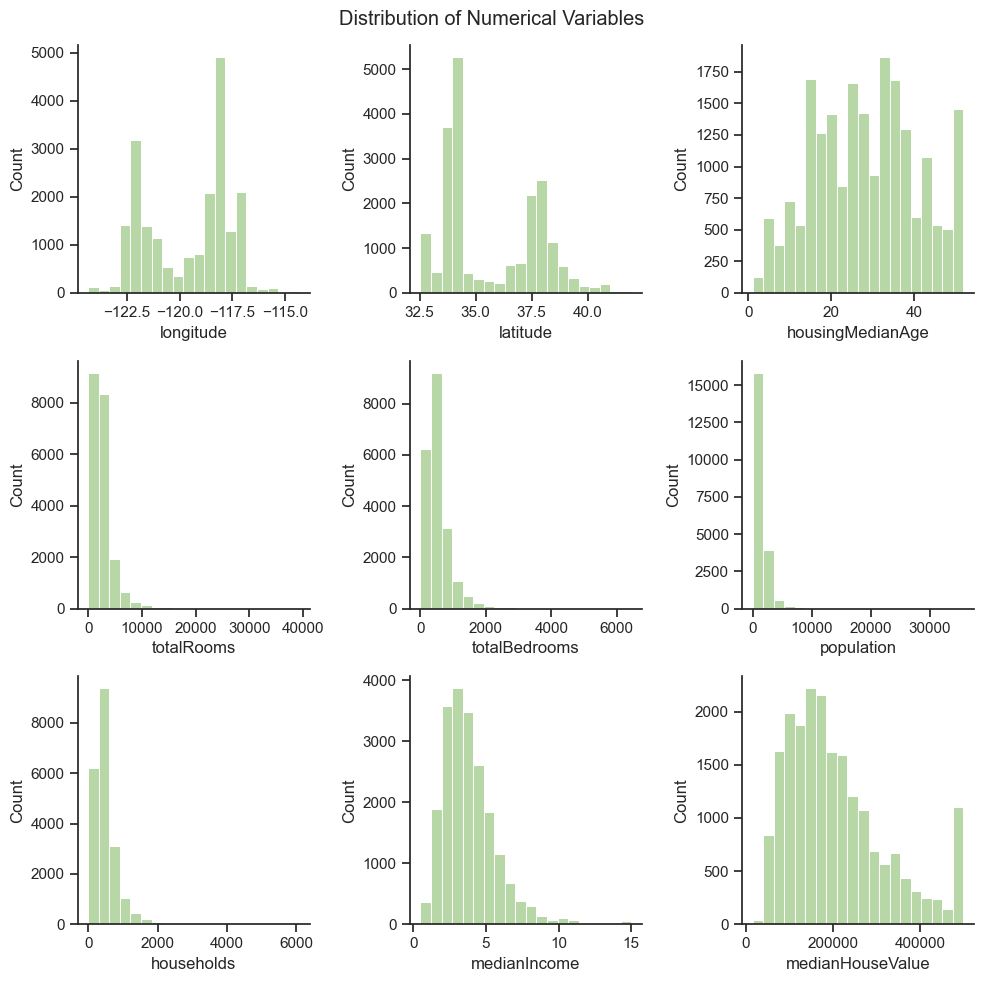

In [74]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
my_cmap = plt.get_cmap("crest")

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
numerical_data = dataset.drop(columns=["oceanProximity"])

# ? Should we scale the data?

for i, ax in enumerate(axes.flat):
    sns.histplot(
        data=numerical_data,
        x=numerical_data.columns[i],
        # log_scale=True,
        bins=20,
        ax=ax,
        alpha=0.8,
        color=my_cmap.colors[0],
        edgecolor="white",
    )
    # ax.set_title(numerical_data.columns[i])

fig.suptitle("Distribution of Numerical Variables")
save_fig("d1_a")

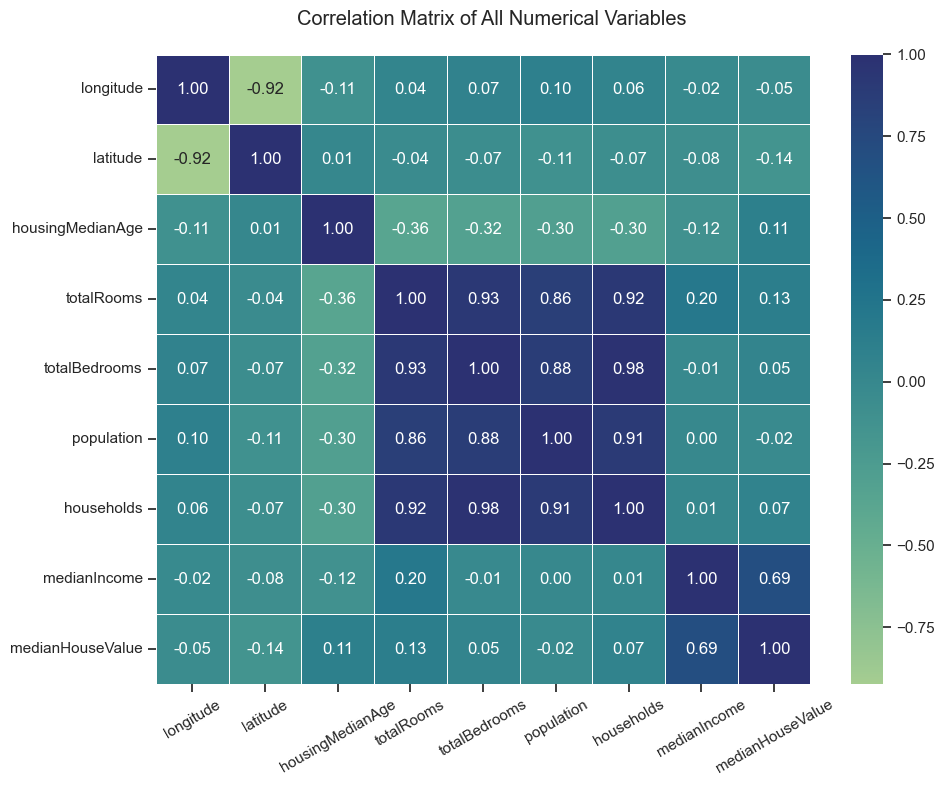

In [80]:
# https://courses.engr.illinois.edu/cs357/fa2019/assets/demos/upload/CA10-ML/Breast-cancer-data.html


# correlation matrix
def plot_correlation_heatmap(X: pd.DataFrame):
    """
    plot correlations of the different variables

    args:
        X (pd.DataFrame): a dataframe of the independent variables

    returns:
        a heatmap of the correlation
    """
    corrmat = X.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.suptitle("Correlation Matrix of All Numerical Variables")
    sns.heatmap(corrmat, annot=True, linewidths=0.5, fmt=".2f", ax=ax, cmap=my_cmap)
    plt.xticks(rotation=30)


plot_correlation_heatmap(numerical_data)
save_fig("d1_b")

In [62]:
target = dataset.iloc[:, -1].to_frame()
data = dataset.drop(columns=["medianHouseValue"])

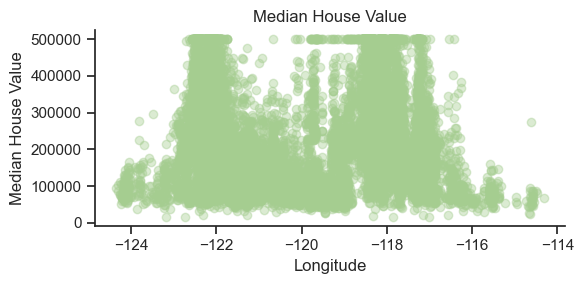

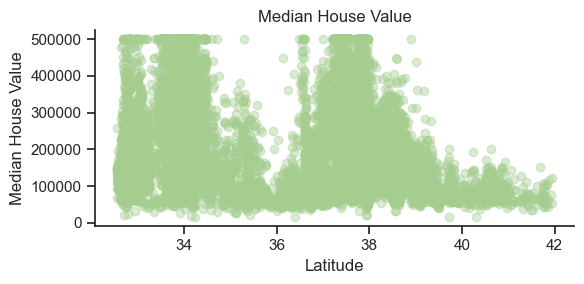

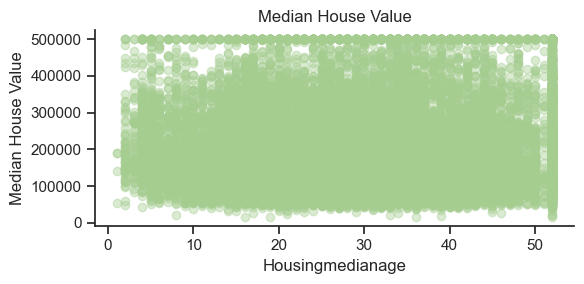

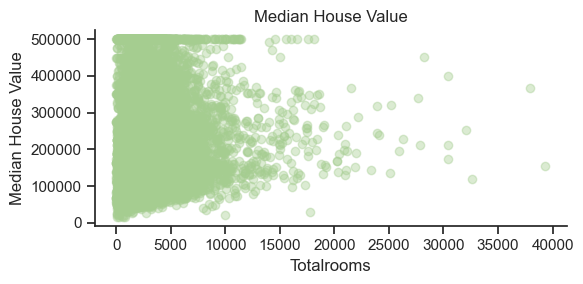

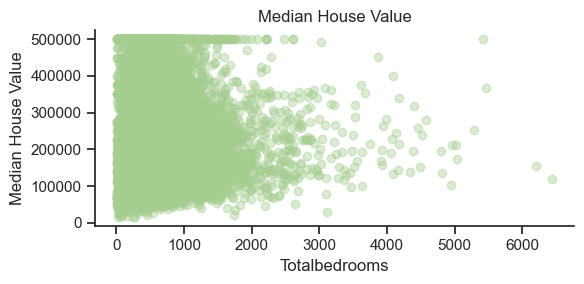

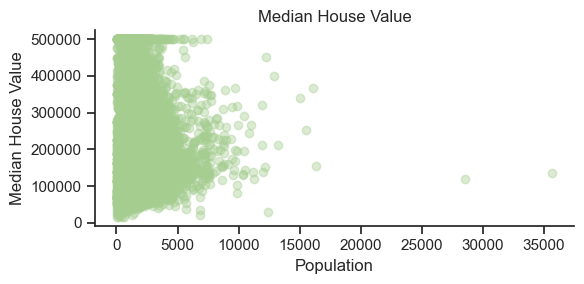

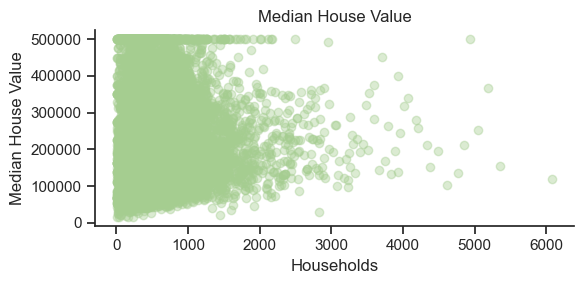

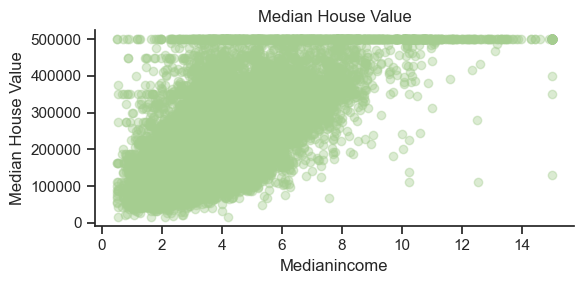

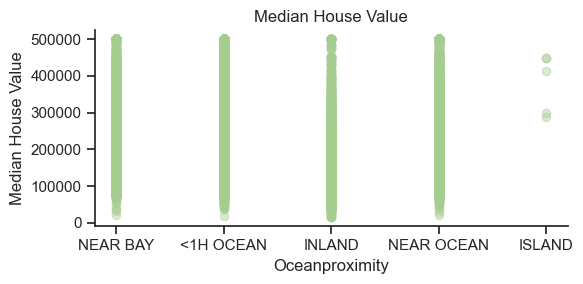

In [83]:
def plot_scatter(data, target, ylabel, i):
    fig, ax = plt.subplots(figsize=(6, 3))
    plt.scatter(data.iloc[:, i], target.iloc[:, 0], alpha=0.4, color=my_cmap.colors[0])
    plt.xlabel(data.columns[i].capitalize())
    plt.ylabel(ylabel)
    # ax.xaxis.set_minor_locator(AutoMinorLocator())
    plt.title(ylabel)
    save_fig(f"d1_c_{i}", tight_layout=True)


for i in range(data.shape[1]):
    plot_scatter(data, target, "Median House Value", i)